In [1]:
#infrared colors of brown dwarfs
import splat
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

#matplotlib defaults
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.2
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'
%matplotlib inline
%matplotlib inline
splat.initializeStandards()

In [2]:
yng= splat.searchLibrary(spt=[20, 30], vlm=True, subdwarf=False, giant=False, young=True)
field= splat.searchLibrary(spt=[20, 30], vlm=True, subdwarf=False, giant=False, young=False)
tdwarfs= splat.searchLibrary(spt=[30, 40], vlm=True, subdwarf=False, giant=False, young=False)

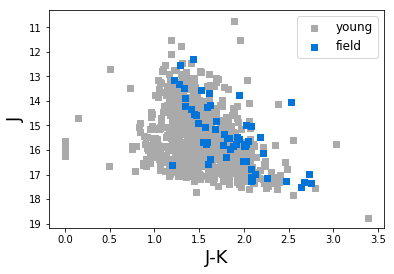

In [15]:
fig, ax=plt.subplots()
ax.invert_yaxis()
plt.scatter(field['J_2MASS']-field['KS_2MASS'], field['J_2MASS'], marker=',', c='#AAAAAA', label='young')
#plt.scatter(tdwarfs['J_2MASS']-tdwarfs['KS_2MASS'], tdwarfs['J_2MASS'],marker=',', c='#B10DC9')
plt.scatter(yng['J_2MASS']-yng['KS_2MASS'], yng['J_2MASS'], marker=',', c='#0074D9', label='field')
ax.set_ylabel('J', fontsize=18)
ax.set_xlabel('J-K', fontsize=18)
plt.legend()
plt.savefig('/users/caganze/desktop/colors.pdf')

In [95]:
yngspecs=splat.getSpectrum(spt=[20, 25], vlm=True, subdwarf=False, giant=False, young=True)


Retrieving 58 files



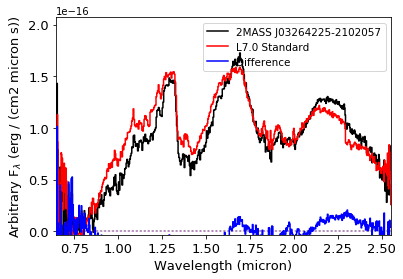

('L7.0', 0.5)

In [96]:
splat.classifyByStandard(yngspecs[10], plot=True, cmprng=[1.1, 1.6])

In [44]:
import splat.model as spmdl

In [199]:
mdls=[]
for g in np.linspace(3.5, 5.5, 10):
    mdls.append(spmdl.loadModel(model='btsettl',teff=1417,logg=g))

In [221]:
import matplotlib as mpl
import matplotlib.cm as cm

norm = mpl.colors.Normalize(vmin=3.5, vmax=5.0)
cmap = cm.Greens

m = cm.ScalarMappable(norm=norm, cmap=cmap)
colors=m.to_rgba(np.linspace(3.5, 5.0, 10))

In [201]:
std=splat.STDS_DWARF_SPEX['L7.0']
std.normalize(waverange=[1.4,1.8])

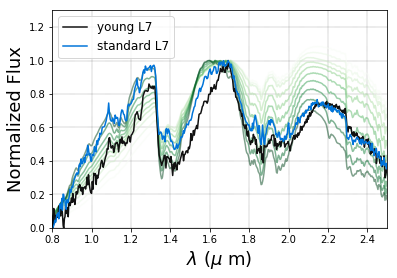

In [222]:
sp=yngspecs[10]
fig, ax=plt.subplots()
ax.set_xlim([0.8, 2.5])
ax.set_ylim([0, 1.3])
sp.normalize(waverange=[1.4,1.8])
for  m, c in zip(mdls, colors):
    m.normalize(waverange=[1.4,1.8])
    ax.plot(m.wave, m.flux, c=c, alpha=0.5)
    
ax.plot(sp.wave, sp.flux, c='#111111', label='young L7')
ax.plot(std.wave, std.flux, c='#0074D9', label='standard L7')
ax.set_xlabel(r'$\lambda$ ($\mu$ m)', fontsize=18)
ax.set_ylabel(r'Normalized Flux', fontsize=18)
sp.reset()
plt.grid()
plt.legend()
plt.savefig('/users/caganze/desktop/young_ldwarf.jpeg')

In [229]:
#spmdl.EVOLUTIONARY_MODELS